# Car Price Prediction with Linear Regression- Raw Python

In [580]:
import numpy as np
import pandas as pd

In [614]:
df = pd.read_csv(r'C:\Users\hp\Downloads\ML\data.csv')  #load dataset from local comp

### Data Cleaning

In [616]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [618]:
df.columns = df.columns.str.lower().str.replace(' ', '_') #change all column headings to lowercase and replace space with dash

In [620]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


#### Exploratory Data Analysis

In [622]:
df.dtypes #view columns with object datatypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [624]:
strings = list(df.dtypes[df.dtypes == object].index) #list of all index under columns with datatype object
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [626]:
for i in strings:
    df[i] = df[i].str.lower().str.replace(' ', '_') #iterates over each index to format

In [628]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [630]:
for col in df.columns:
    print(col) #prints column then
    print(df[col].unique()[:5])#print first 5 unique values of col
    print(df[col].nunique()) #prints total number of different values of col

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
year
[2011 2012 2013 1992 1993]
28
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
engine_hp
[335. 300. 230. 320. 172.]
356
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
number_of_doors
[ 2.  4.  3. nan]
3
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
vehicle_size
['compact' 'midsize' 'large']
3
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
highway_mpg
[26 28 27 25 24]
59
city_mpg
[19 20 18 17 16]
69
popularity
[3916 3105  819  617 1013]
48
msrp
[46135 40650 36350 29450 34500]
6049


In [632]:
df['year'].min()

1990

In [634]:
df['year'].max()

2017

Visualization of columns

In [595]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline   #ensures visual in notebook

UsageError: unrecognized arguments: #ensures visual in notebook


In [ ]:
sns.histplot(df.msrp, bins=50)

In [ ]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50) #removes long tail of graph

In [ ]:
#### about 1500+ pf the cars are about priced 1000 and the distrubtion looks normal if we do a log plot to remove long tail with the code below
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

Missing values

In [636]:
df.isnull().sum()  #sum of all null index for each column

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

#### Linear Regression 


Setting up validation framework. We divide the entire dataset into %60 train, 20% validation and 20% test.

In [638]:
len(df)   #check lenght


11914

In [640]:
n = len(df) #sets lenght
#n_val = int(n * 0.2) #int is used to round the value
#n_test = int(n * 0.2)
#n_train = int(n - n_val + n_test)

n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n - n_train + n_val)

In [642]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [644]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7143,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,rear_wheel_drive,2.0,NaN,compact,2dr_suv,19,14,586,2000
7144,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,rear_wheel_drive,2.0,NaN,compact,2dr_suv,19,14,586,2000
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000


In [ ]:
df_val

In [ ]:
df_test

In [646]:
idx = np.arange(n) #saves the default index to a varable
np.random.seed(2) # sets seed
np.random.shuffle(idx) #shuffles idx and uses the shuffle instead

In [648]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [650]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11913,lincoln,zephyr,2006,regular_unleaded,221.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,26,17,61,28995
3602,cadillac,dts,2010,premium_unleaded_(recommended),275.0,8.0,automatic,front_wheel_drive,4.0,luxury,large,sedan,23,15,1624,46280
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215


In [ ]:
df_val

In [652]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
df_test

In [654]:
y_train = np.log1p(df_train.msrp.values) 
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [656]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [658]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.91328684,
       10.28247178, 10.45380308])

In [660]:
len(y_train)

7148

Linear Regression Models

Foundation example: 
g(x1) = y1 where g is the algorith or the model, x1 is the feature matrix of a sample car(iloc10), and y is the target; the price. 

In [ ]:
df_train.iloc[10]

In [ ]:
xi = [453, 11, 86] #choosing a sample feature matrix ie engine_hp, city_mpg, popularity

In [ ]:
# w0 = biostrun is the prediction made when there's no known feature matrix. Ie assuming u know nothing about the car.
# w = the weight of the feature. how valuable the feature is in calculating the price.
# g(xi) = w0 + w1*xi1 + w2*xi2 + w3*xi3 +...
#in python code:

#w0 = 0
w0 = 7.17
#w = [1,1,1]
w = [0.01, 0.04, 0.002]    

In [ ]:
def linear_regression(xi):
    n = len(xi)
    pred = w0

    for j in range(n):
        pred = pred + w[j]*xi[j]
        
    return pred

In [ ]:
linear_regression(xi) #predicts a value but wrong because we set random vales for w0 and w.

Values of w0 and w

reset w0 to 7.17
w = [0.01, 0.04, 0.002]
returns 12.312. however this is an exponential log value of msrp we did above. Need to convert it back for actual value

In [ ]:
np.expm1(12.312) #how to convert np.log1p back

#predicted price below

### Linear Regression with Vector Matrix

True LR model will view the whole dataset together and not a single sample as done above. Hence input a vector.

#g(Xw) = y
#where X is the feature matrix, w is vector of weights and biostrum, and y is output. This is a matrix vector multiplication hence we use numpy dot product.

In [ ]:
w_new = [w0] + w   #joins w0 and w into a single array and multiples by x assuming the x value for w0 is 1.
w_new

In [ ]:
x1 = [1, 148, 24, 1385] #1 is the x value for w0. assumed
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X =[x1, x2, x10]
X = np.array(X)
X

In [ ]:
def linear_regression(X):
    return X.dot(w_new)

In [ ]:
linear_regression(X)

### Training a LR Model

Real Equation for w:

g(Xw) = y

to make w stand alone,

we multiply XT by both sides to square the matrix
XT * X # gram matrix.multiplying a matrix with it's transpose.this squares the matrix and allows us find an inverse for it. 

(XT*X)w = (XT)y
The dot product of a square matrix and its inverse gives an identity matrix hence
(XTX)inv *(XTX) * w = XTXinv * XT * y
 Iw = XTXinv * XT * y
Iw = w;

therefore w = XTXinv *XT *y
 

In [ ]:
def train_linear_regression(X, y):
    pass

In [ ]:
#w = XTX_inv.dot(X.T).dot(y)

X = [
    [148,   24, 1385],
    [132,   25, 2031],
    [453,   11,   86],
     [158,   24, 185],
    [172,   25, 201],
    [413,   11,   86],
    [38,   54, 185],
    [142,   25, 431],
     [453,   31,   86],
]
X = np.array(X)
X

In [ ]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [ ]:
ones = np.ones(X.shape[0]) #adds 1 to the array as w0
ones

In [ ]:
X = np.column_stack([ones, X])

In [ ]:
XTX = X.T.dot(X)  #GRAM MATRIX

In [ ]:
XTX_inv = np.linalg.inv(XTX) # inverse of XTX

In [ ]:
XTX.dot(XTX_inv).round(1)  #checks if it gives inverse matrix round to .1


In [ ]:
w_full = XTX_inv.dot(X.T).dot(y)  #w_full total of w and w0
w_full

In [ ]:
w0 = w_full[0]
w = w_full[1:]

In [ ]:
w0, w

Condensing all into a function

In [ ]:
def train_linear_regression (X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [ ]:
train_linear_regression(X, y)

### Model

In [662]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [664]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity' ]
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7143,221.0,6.0,26,17,61
7144,275.0,8.0,23,15,1624
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873


In [666]:
X_train = df_train[base].values

In [ ]:
y_train

In [672]:
train_linear_regression(X_train, y_train)  #RETURNS NAN due to missing values

(nan, array([nan, nan, nan, nan, nan]))

In [702]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [708]:
 X_train = df_train[base].fillna(0).values

In [678]:
w0, w = train_linear_regression(X_train, y_train)

In [680]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.5479597 ,  9.38746219,  9.67184806, ..., 10.59340729,
       10.11122602, 10.30398198])

<Axes: ylabel='Count'>

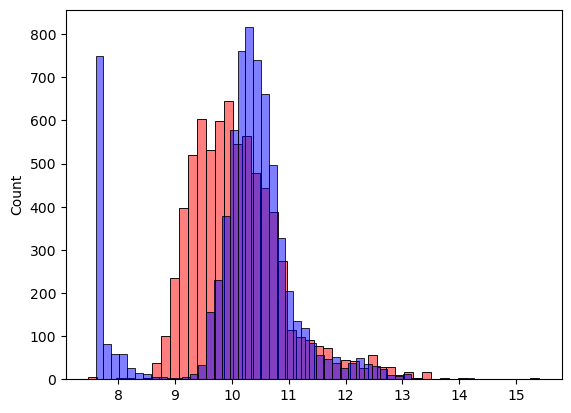

In [682]:
sns.histplot(y_pred, color = 'red', bins = 50, alpha = 0.5)
sns.histplot(y_train, color = 'blue', bins = 50, alpha = 0.5)

The graph shows our model (red) predicted values below the real values (blue). To quantify the difference, we use root mean square error.


### Root Mean Square Error

In [684]:
def rmse(y_train, y_pred):
     error = y_train - y_pred
     se = error ** 2
     mse = se.mean()
     rmse=  np.sqrt(mse)
     return rmse

In [686]:
rmse(y_train, y_pred)

0.7554591756909307

### Trying out Validation data

In [694]:
##writing a universal function to always clean X

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [712]:
X_train = prepare_X(df_train)              #for train dataset always use w0, and w from train data to validate the val dataset
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)            # for val dataset
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.761829753572965

To improve the value of rmse, we need to get it closer to 0.0 as possible. Improved by doing feature engineering.

### Feature Engineering and Categorical Variables


In [716]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [728]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)            # for val dataset
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5171097946609341

Model improved with the addition of age


In [731]:
for v in [2,3,4]:
          df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

0       1
1       0
2       0
3       0
4       0
       ..
7143    0
7144    0
7145    1
7146    1
7147    0
Name: number_of_doors, Length: 7148, dtype: int32

In [764]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [766]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [300.,   6.,  31., ...,   1.,   0.,   0.],
       [210.,   4.,  30., ...,   1.,   0.,   0.],
       [285.,   6.,  22., ...,   0.,   0.,   1.]])

In [768]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)            # for val dataset
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5157158684881104

Adding number of doors variation improves the model slightly

In [770]:
makes = list(df.make.value_counts().head().index) #checks most popular values and retursn a lsit

In [772]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v) 
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [774]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)            # for val dataset
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5074572881973072

Adding the make of car improved rsme slightly

In [785]:
categorical_variables = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category',
            'vehicle_size', 'vehicle_style']
    

categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [793]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    ##code to iterate over each of the categories and do as done for make, and number of doors.
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c,v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c,v)) 
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [795]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)            # for val dataset
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

101.40395552299128

Our model performs worse due to regularization. w0 and w were high from the model.

xtx inv doesn't always exist.

#### Regularization is ameans of controlling the weights w

In [801]:
def train_linear_regression_reg (X, y, r = 0.001): #r = regularized
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])  #adds a small number to the diagonal of the gram matrix.
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [803]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)            # for val dataset
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.45647150527046676

Toodles! regularizing with a random value of r makes the model perform better., the value or r shouldn't be too high like 10, or too low like 0.0

To find the best value for r, we tune the model

In [808]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10 ]:
    #try different decimanl points of r
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)            # for val dataset
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(r, w0, score)

0.0 -7740262835214578.0 101.40395552299128
1e-05 10.63568882184121 0.45646667748191116
0.0001 6.300332331301773 0.4564667148623214
0.001 6.287265696674994 0.45646714685973666
0.1 6.1923617183558575 0.4565175951769417
1 5.635877888659117 0.45715914390331375
10 4.284323759589057 0.47005207434258167


choose the best from the list. r= 0.0001

In [811]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.0001)

X_val = prepare_X(df_val)            # for val dataset
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
score

0.4564667148623214

### Testing the Model on Test Dataset

In [814]:
df_full_train = pd.concat([df_train, df_val])

In [816]:
df_full_train = df_full_train.reset_index(drop = True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9525,bmw,7_series,2015,premium_unleaded_(required),445.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,high-performance",large,sedan,25,17,3916
9526,volvo,xc90,2017,premium_unleaded_(recommended),316.0,4.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",large,4dr_suv,25,20,870
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238


In [818]:
X_full_train = prepare_X(df_full_train)

In [820]:
y_full_train = np.concatenate([y_train, y_val])

In [826]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.0001) ##training out full data done

In [828]:
#test on test dataset
X_test = prepare_X(df_test)            # for val dataset
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
score

0.45172176737371955

Model is working but error still not practically good. We use it anyway to predict 

In [835]:
car = df_test.iloc[20].to_dict()  #selects a random car from test and converts it to a df.
car

{'make': 'gmc',
 'model': 'sierra_1500',
 'year': 2016,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 355.0,
 'engine_cylinders': 8.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'four_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'crew_cab_pickup',
 'highway_mpg': 22,
 'city_mpg': 16,
 'popularity': 549}

In [845]:
df_small = pd.DataFrame([car])
df_small
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred
np.expm1(y_pred)  #undo the log of msrp

63012.96526290392

In [847]:
np.expm1(y_test[20])

54240.00000000002

The model predicts 63k on a 54k price. with a rmse of 0.45..

#### End of Project